![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

# Günther-Salzer model -- damage free component

Following:

Günther, R.-M., Salzer, K., Popp, T., & Lüdeling, C. (2015). Steady-State Creep of Rock Salt: Improved Approaches for Lab Determination and Modelling. Rock Mechanics and Rock Engineering, 48(6), 2603–2613. https://doi.org/10.1007/s00603-015-0839-2

Günther, R., & Salzer, K. (2012). Advanced strain-hardening approach. In Mechanical Behaviour of Salt VII (Issue December 2016). CRC Press. https://doi.org/10.1201/b12041-4

\begin{align}
    \dot{\epsilon}_\text{cr} &= \dot{\epsilon}_\text{cr}^\text{V} + \dot{\epsilon}_\text{cr}^\text{E}
    \\
    \dot{\epsilon}_\text{cr} &= A_\text{p} \frac{ (\bar{\sigma}/\sigma_\text{ref})^{n_\text{p}}}{\left( \epsilon^\text{V}_0 + \epsilon_\text{cr}^\text{V} \right)^{\mu_\text{p}}} \quad \text{with} \quad \bar{\sigma} = \sqrt{\frac{3}{2}} \left\lVert \mathbf{s} \right\rVert
    \\
    \dot{\epsilon}_\text{cr}^\text{E} &= \sum \limits_{i=1}^2 A_{\text{s},i} \exp \left( - \frac{Q_i}{RT} \right) \left( \frac{\bar{\sigma}}{\sigma_\text{ref}} \right)^{n_i}
\end{align}

3D:

$$
    \dot{\boldsymbol\epsilon}_\text{cr} = \sqrt{\frac{3}{2}} \dot{\epsilon}_\text{cr} \frac{\mathbf{s}}{\left\lVert \mathbf{s} \right\rVert}
$$

In [30]:
#HIDDEN
import mtest
import tfel.math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
import plot_settings
%run plot_settings.py
mtest.setVerboseMode(mtest.VerboseLevel.VERBOSE_QUIET)

In [32]:
#HIDDEN
build_release = 'mfront --obuild --interface=generic GuentherSalzer.mfront'
os.system(build_release)

Treating target : all
The following library has been built :
- libBehaviour.so :  ModCamClayStandard_AxisymmetricalGeneralisedPlaneStrain ModCamClayStandard_Axisymmetrical ModCamClayStandard_PlaneStrain ModCamClayStandard_GeneralisedPlaneStrain ModCamClayStandard_Tridimensional ModCamClay_Merge_AxisymmetricalGeneralisedPlaneStrain ModCamClay_Merge_AxisymmetricalGeneralisedPlaneStress ModCamClay_Merge_Axisymmetrical ModCamClay_Merge_PlaneStress ModCamClay_Merge_PlaneStrain ModCamClay_Merge_GeneralisedPlaneStrain ModCamClay_Merge_Tridimensional ModCamClay_semiExplParaInitNLnu_AxisymmetricalGeneralisedPlaneStrain ModCamClay_semiExplParaInitNLnu_AxisymmetricalGeneralisedPlaneStress ModCamClay_semiExplParaInitNLnu_Axisymmetrical ModCamClay_semiExplParaInitNLnu_PlaneStress ModCamClay_semiExplParaInitNLnu_PlaneStrain ModCamClay_semiExplParaInitNLnu_GeneralisedPlaneStrain ModCamClay_semiExplParaInitNLnu_Tridimensional ModCamClay_semiExplParaInit_AxisymmetricalGeneralisedPlaneStrain ModCamClay_

0

mmetricalGeneralisedPlaneStress ModCamClay_semiExplParaInit_Axisymmetrical ModCamClay_semiExplParaInit_PlaneStress ModCamClay_semiExplParaInit_PlaneStrain ModCamClay_semiExplParaInit_GeneralisedPlaneStrain ModCamClay_semiExplParaInit_Tridimensional ModCamClay_semiExplParaInitNLnu_abs_AxisymmetricalGeneralisedPlaneStrain ModCamClay_semiExplParaInitNLnu_abs_AxisymmetricalGeneralisedPlaneStress ModCamClay_semiExplParaInitNLnu_abs_Axisymmetrical ModCamClay_semiExplParaInitNLnu_abs_PlaneStress ModCamClay_semiExplParaInitNLnu_abs_PlaneStrain ModCamClay_semiExplParaInitNLnu_abs_GeneralisedPlaneStrain ModCamClay_semiExplParaInitNLnu_abs_Tridimensional ModCamClay_semiExplParaInitNLnu_inc_AxisymmetricalGeneralisedPlaneStrain ModCamClay_semiExplParaInitNLnu_inc_AxisymmetricalGeneralisedPlaneStress ModCamClay_semiExplParaInitNLnu_inc_Axisymmetrical ModCamClay_semiExplParaInitNLnu_inc_PlaneStress ModCamClay_semiExplParaInitNLnu_inc_PlaneStrain ModCamClay_semiExplParaInitNLnu_inc_GeneralisedPlaneStr

## Analytical solution for constant strain rate (primary creep)

Analytische Lösung unter der Voraussetzung, dass $\dot{\epsilon}_\text{cr}^\text{E} = 0$ und somit $\epsilon_\text{cr} \equiv \epsilon_\text{cr}^\text{V}$:

$$
    \dot{\epsilon}_\text{cr} = A_\text{p} \frac{ (\bar{\sigma}/\sigma_\text{ref})^{n_\text{p}}}{\left( \epsilon^\text{V}_0 + \epsilon_\text{cr} \right)^{\mu_\text{p}}}
$$

Sei die Verzerrungsrate $\dot{\epsilon}$ als konstant vorgegeben und seien elastische Verformungen vernachlässigbar, so dass $\dot{\epsilon} = \dot{\epsilon}_\text{cr}$ gilt. Dann ergibt sich die Effektivspannung als Funktion der Kriechrate

$$
    \bar{\sigma} = \sigma_\text{ref} \sqrt[n_\text{p}]{\frac{\dot{\epsilon} (\epsilon_0^\text{V} + \epsilon)^{\mu_\text{p}}}{A_\text{p}}}
$$

Im Triaxialversuch gilt $\bar{\sigma} = \sigma_1 - \sigma_3$.

In [33]:
s_eff_analyt = lambda dot_eps, eps, eps0, A, n, m: np.power( dot_eps/A * np.power(eps0 + eps, m), 1/n)

In [34]:
#HIDDEN
def run_analyt(dot_eps, eps0, A, n, mup):
    t_discrete = np.linspace(0,-0.25/(dot_eps * 86400),1000)
    m    = mtest.MTest()
    m.setMaximumNumberOfSubSteps(10)
    m.setBehaviour('generic', 'src/libBehaviour.so', 'GuentherSalzer')
    m.setImposedStress('SXX', 0.0)
    m.setImposedStress('SYY', 0.0)
    m.setImposedStrain('EZZ', {0: 0, -0.25/(dot_eps * 86400): -0.25, 100: -.25})
    m.setImposedStress('SXZ', 0.0)
    m.setImposedStress('SYZ', 0.0)
    m.setImposedStress('SXY', 0.0)
    m.setMaterialProperty('YoungModulus', 1e6)
    m.setMaterialProperty('PoissonRatio', 0.27)
    m.setMaterialProperty('PrimaryPowerLawFactor', A)
    m.setMaterialProperty('PrimaryPowerLawExponent', n)
    m.setMaterialProperty('SecondaryPowerLawFactor1', 0)
    m.setMaterialProperty('SecondaryPowerLawExponent1', 1)
    m.setMaterialProperty('SecondaryActivationEnergy1', 54e3)
    m.setMaterialProperty('SecondaryPowerLawFactor2', 0)
    m.setMaterialProperty('SecondaryPowerLawExponent2', 1)
    m.setMaterialProperty('SecondaryActivationEnergy2', 54e3)
    m.setMaterialProperty('HardeningExponent', mup)
    m.setMaterialProperty('InitialHardening', eps0)
    m.setMaterialProperty('ReferenceStress', 1)
    m.setExternalStateVariable("Temperature", 293.15)
    s = mtest.MTestCurrentState()
    wk = mtest.MTestWorkSpace()
    m.completeInitialisation()
    m.initializeCurrentState(s)
    m.initializeWorkSpace(wk)
    numerical_s = np.array([0.])
    numerical_e = np.array([0.])
    for i in range(len(t_discrete)-1):
        m.execute(s, wk, t_discrete[i], t_discrete[i + 1])
        numerical_s = np.append(numerical_s,s.s1[2])
        numerical_e = np.append(numerical_e,s.e1[2])
    return numerical_e, numerical_s

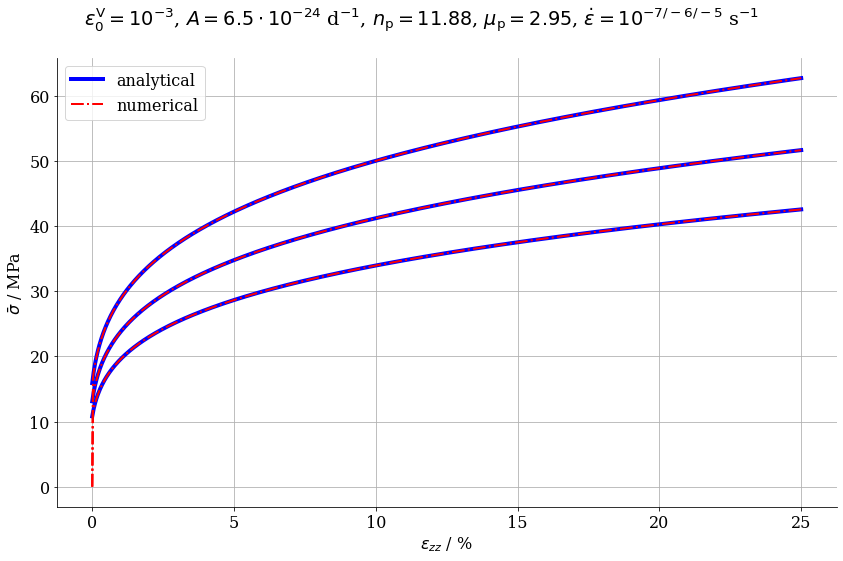

In [35]:
#HIDDEN
fig,ax = plt.subplots(figsize=(12,8))
eps_in = np.linspace(0,0.25,1000)
for doteps in [1e-7,1e-6,1e-5]:
    n_e, n_s = run_analyt(-doteps,1e-3,6.5e-24,11.88,2.95)
    if doteps==1e-7:
        ax.plot(eps_in*100, s_eff_analyt(doteps*86400, eps_in, 1e-3,6.5e-24,11.88,2.95),label='analytical',lw=4,color='b')
        ax.plot(-n_e*100, -n_s,ls='-.', label='numerical',color='r')
    else:
        ax.plot(eps_in*100, s_eff_analyt(doteps*86400, eps_in, 1e-3,6.5e-24,11.88,2.95),lw=4,color='b')
        ax.plot(-n_e*100, -n_s,ls='-.', color='r')
ax.set_xlabel('$\\epsilon_{zz}$ / %')
ax.set_ylabel('$\\bar{\\sigma}$ / MPa')
ax.grid('both')
ax.legend();
fig.suptitle('$\\epsilon_0^\\mathrm{V} = 10^{-3}$, $A = 6.5 \\cdot 10^{-24}$ d$^{-1}$, $n_\\mathrm{p} = 11.88$, $\\mu_\\mathrm{p} = 2.95$, $\\dot{\epsilon} = 10^{-7/-6/-5}$ s$^{-1}$')
fig.tight_layout();

## Analytical solution for constant effective stress (primary creep)

Under similar assumptions (only primary creep strain) we look at a case of constant effective stress. We depart from

$$
    (\epsilon_0^\text{V} + \epsilon)^{\mu_\text{p}}\, \text{d}\epsilon = A_\text{p} \left( \frac{\bar{\sigma}}{\sigma_\text{ref}} \right)^{n_\text{p}}\, \text{d}t
$$

Integration yields:

\begin{align}
    \int \limits_{\epsilon_0}^\epsilon (\epsilon_0^\text{V} + \tilde{\epsilon})^{\mu_\text{p}}\, \text{d}\tilde{\epsilon} &= \int \limits_{t_0}^t A_\text{p} \left( \frac{\bar{\sigma}}{\sigma_\text{ref}} \right)^{n_\text{p}}\, \text{d}\tilde{t}
    \\
    \frac{1}{\mu_\text{p}+1} \left[ (\epsilon_0^\text{V} + \epsilon)^{\mu_\text{p}+1} - (\epsilon_0^\text{V} + \epsilon_0)^{\mu_\text{p}+1} \right] &= A_\text{p} \left( \frac{\bar{\sigma}}{\sigma_\text{ref}} \right)^{n_\text{p}} (t - t_0)
\end{align}

Thus, we arrive at the following time-creep strain expression for a constant-stress interval:

$$
    \epsilon = \left[ A_\text{p} (\mu_\text{p} + 1) \left( \frac{\bar{\sigma}}{\sigma_\text{ref}} \right)^{n_\text{p}} (t-t_0) + (\epsilon_0^\text{V} + \epsilon_0)^{\mu_\text{p}+1} \right]^{\frac{1}{\mu_\text{p} + 1}} - \epsilon_0^\text{V}
$$


In [36]:
eps_analyt = lambda t, s_eff, t0, eps0, epsV0, A, n, m: np.power(A*(m+1)*np.power(s_eff,n)*(t - t0) + np.power(epsV0 + eps0,m+1),1/(m+1)) - epsV0

In [37]:
E = 1e5 #MPa
nu = 0.27
#
Ap = 6.5e-24 #1/d
npe = 11.88 #11.2, #quite sensitive
s0 = 1.0 #MPa
mup = 2.95 #quite sensitive
epsv0 = 0.0001 # very sensitive parameter!
#
As1 = 0.0
Q1 = 40e3
ns1 = 2.7
As2 = 0.0
Q2 = 65e3
ns2 = 6.8

In [38]:
#HIDDEN
def run_creep_IfG(t_discrete, sdiff=-25):
    m    = mtest.MTest()
    m.setMaximumNumberOfSubSteps(10)
    m.setBehaviour('generic', 'src/libBehaviour.so', 'GuentherSalzer')
    m.setImposedStress('SXX', 0.0)
    m.setImposedStress('SYY', 0.0)
    m.setImposedStress('SZZ', {0: 0, 0.1:-16, 60: -16, 60.1: sdiff, 400: sdiff})
    m.setImposedStress('SXZ', 0.0)
    m.setImposedStress('SYZ', 0.0)
    m.setImposedStress('SXY', 0.0)
    m.setMaterialProperty('YoungModulus', E)
    m.setMaterialProperty('PoissonRatio', nu)
    m.setMaterialProperty('PrimaryPowerLawFactor', Ap)
    m.setMaterialProperty('PrimaryPowerLawExponent', npe)
    m.setMaterialProperty('SecondaryPowerLawFactor1', As1)
    m.setMaterialProperty('SecondaryPowerLawExponent1', ns1)
    m.setMaterialProperty('SecondaryActivationEnergy1', Q1)
    m.setMaterialProperty('SecondaryPowerLawFactor2', As2)
    m.setMaterialProperty('SecondaryPowerLawExponent2', ns2)
    m.setMaterialProperty('SecondaryActivationEnergy2', Q2)
    m.setMaterialProperty('HardeningExponent', mup)
    m.setMaterialProperty('InitialHardening', epsv0)
    m.setMaterialProperty('ReferenceStress', s0)
    m.setExternalStateVariable("Temperature", 293.15)
    s = mtest.MTestCurrentState()
    wk = mtest.MTestWorkSpace()
    m.completeInitialisation()
    m.initializeCurrentState(s)
    m.initializeWorkSpace(wk)
    numerical = np.array([0.])
    for i in range(len(t_discrete)-1):
        m.execute(s, wk, t_discrete[i], t_discrete[i + 1])
        numerical = np.append(numerical,s.e1[2])
    return numerical

In [39]:
#HIDDEN
ndt = 200
times = np.append(np.linspace(0,10,ndt),
                  np.append(
                      np.linspace(11,60,ndt),
                      np.append(
                          np.linspace(60.1,70,ndt),
                          np.linspace(71,200,ndt)
                      )
                  )
                 )

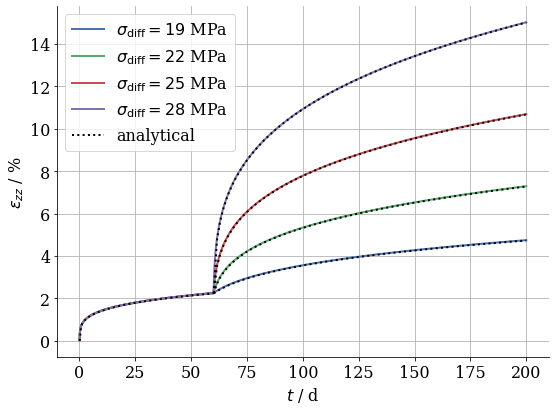

In [40]:
#HIDDEN
sigs = [-19,-22,-25,-28]
fig,ax = plt.subplots()
for sig in sigs:
    ax.plot(times[1:],-run_creep_IfG(times,sig)[1:]*100,label='$\\sigma_\\mathrm{diff} = %i$ MPa' %(-sig))

t_an_1 = np.linspace(0.1,60,100)
ax.plot(t_an_1, eps_analyt(t_an_1, 16, 0.1, 0., 1.e-4, Ap, npe, mup)*100,color='black',ls=':',label='analytical')

t_an_2 = np.linspace(60.1,200,100)
for sig in sigs:
    ax.plot(t_an_2, eps_analyt(t_an_2, -sig, 60.1, eps_analyt(60, 16, 0.1, 0., 1.e-4, Ap, npe, mup), 1.e-4, Ap, npe, mup)*100,color='black',ls=':')
ax.set_xlabel('$t$ / d')
ax.set_ylabel('$\\epsilon_{zz}$ / %')
ax.grid('both')
ax.legend();
fig.tight_layout();
fig.savefig('two_stage_creep.pdf');

## Multistage creep test

In [41]:
#HIDDEN
def run_creep_BMBF(t_discrete):
    m    = mtest.MTest()
    m.setMaximumNumberOfSubSteps(10)
    m.setBehaviour('generic', 'src/libBehaviour.so', 'GuentherSalzer')
    m.setImposedStress('SXX', 0.0)
    m.setImposedStress('SYY', 0.0)
    m.setImposedStress('SZZ', {0: 0, 0.1: -20, 60: -20, 60.1: -15, 150: -15, 150.1: -20, 170:-20, 170.1: -18, 380: -18, 380.1: -20, 450: -20})
    m.setImposedStress('SXZ', 0.0)
    m.setImposedStress('SYZ', 0.0)
    m.setImposedStress('SXY', 0.0)
    m.setMaterialProperty('YoungModulus', E)
    m.setMaterialProperty('PoissonRatio', nu)
    m.setMaterialProperty('PrimaryPowerLawFactor', Ap)
    m.setMaterialProperty('PrimaryPowerLawExponent', npe)
    m.setMaterialProperty('SecondaryPowerLawFactor1', As1)
    m.setMaterialProperty('SecondaryPowerLawExponent1', ns1)
    m.setMaterialProperty('SecondaryActivationEnergy1', Q1)
    m.setMaterialProperty('SecondaryPowerLawFactor2', As2)
    m.setMaterialProperty('SecondaryPowerLawExponent2', ns2)
    m.setMaterialProperty('SecondaryActivationEnergy2', Q2)
    m.setMaterialProperty('HardeningExponent', mup)
    m.setMaterialProperty('InitialHardening', epsv0)
    m.setMaterialProperty('ReferenceStress', s0)
    m.setExternalStateVariable("Temperature", 293.15)
    s = mtest.MTestCurrentState()
    wk = mtest.MTestWorkSpace()
    m.completeInitialisation()
    m.initializeCurrentState(s)
    m.initializeWorkSpace(wk)
    numerical = np.array([0.])
    for i in range(len(t_discrete)-1):
        m.execute(s, wk, t_discrete[i], t_discrete[i + 1])
        numerical = np.append(numerical,s.e1[2])
    return numerical

In [42]:
#HIDDEN
times = np.linspace(0,450,10000)

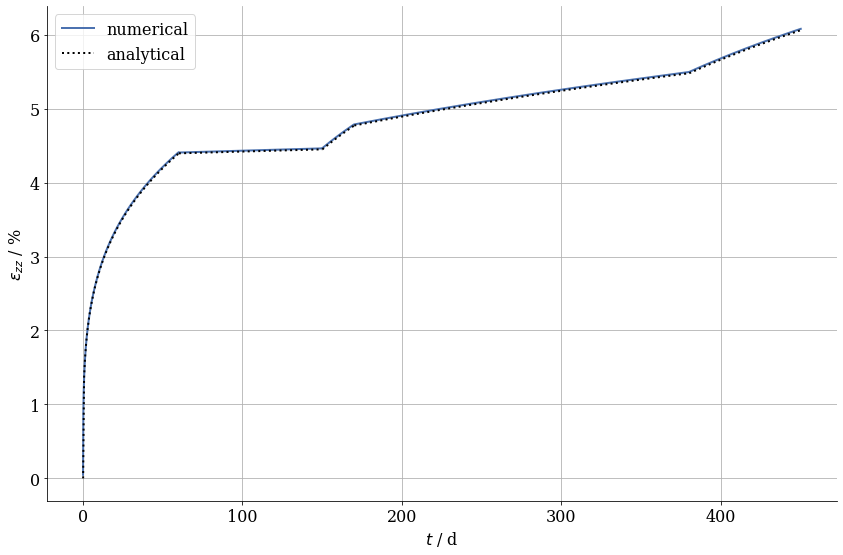

In [43]:
#HIDDEN
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(times[1:],-run_creep_BMBF(times)[1:]*100,label='numerical')
t_an_1 = np.linspace(0.1,60,100)
ax.plot(t_an_1, eps_analyt(t_an_1, 20, 0.1, 0., 1.e-4, Ap, npe, mup)*100,color='black',ls=':',label='analytical')
eps_end1 = eps_analyt(60.1, 20, 0.1, 0., 1.e-4, Ap, npe, mup)
#
t_an_2 = np.linspace(60.1,150,100)
ax.plot(t_an_2, eps_analyt(t_an_2, 15, 60.1, eps_end1, 1.e-4, Ap, npe, mup)*100,color='black',ls=':')
eps_end2 = eps_analyt(150.1, 15, 60.1, eps_end1, 1.e-4, Ap, npe, mup)
#
t_an_3 = np.linspace(150.1,170,100)
ax.plot(t_an_3, eps_analyt(t_an_3, 20, 150.1, eps_end2, 1.e-4, Ap, npe, mup)*100,color='black',ls=':')
eps_end3 = eps_analyt(170.1, 20, 150.1, eps_end2, 1.e-4, Ap, npe, mup)
#
t_an_4 = np.linspace(170.1,380,100)
ax.plot(t_an_4, eps_analyt(t_an_4, 18, 170.1, eps_end3, 1.e-4, Ap, npe, mup)*100,color='black',ls=':')
eps_end4 = eps_analyt(380.1, 18, 170.1, eps_end3, 1.e-4, Ap, npe, mup)
#
t_an_5 = np.linspace(380.1,450,100)
ax.plot(t_an_5, eps_analyt(t_an_5, 20, 380.1, eps_end4, 1.e-4, Ap, npe, mup)*100,color='black',ls=':')

ax.set_xlabel('$t$ / d')
ax.set_ylabel('$\\epsilon_{zz}$ / %')
ax.grid('both')
ax.legend()
fig.tight_layout();

## Rock Mech Rock Eng Test

In [44]:
E = 25e4 #MPa
nu = 0.27
#
Ap = 5.5e-40 #1/d
npe = 19.6
s0 = 1.0 #MPa
mup = 5.25
epsv0 = 0.0001 # very sensitive parameter!
#
As1 = 0.05
Q1 = 40e3
ns1 = 2.7
As2 = 0.02
Q2 = 65e3
ns2 = 6.8

In [45]:
#HIDDEN
def run_creep_Asse(T = 299, t1=45, t2 = 30, sdiff1=-25, sdiff2 = -25, s3 = -20.):
    t_discrete = np.linspace(0,t1+t2,1000)
    m    = mtest.MTest()
    m.setMaximumNumberOfSubSteps(10)
    m.setBehaviour('generic', 'src/libBehaviour.so', 'GuentherSalzer')
    m.setImposedStress('SXX', s3)
    m.setImposedStress('SYY', s3)
    m.setImposedStress('SZZ', {0: s3, 1:s3+sdiff1, t1: s3+sdiff1, t1+1: s3+sdiff2, t2+t1: s3+sdiff2})
    m.setImposedStress('SXZ', 0.0)
    m.setImposedStress('SYZ', 0.0)
    m.setImposedStress('SXY', 0.0)
    m.setMaterialProperty('YoungModulus', E)
    m.setMaterialProperty('PoissonRatio', nu)
    m.setMaterialProperty('PrimaryPowerLawFactor', Ap)
    m.setMaterialProperty('PrimaryPowerLawExponent', npe)
    m.setMaterialProperty('SecondaryPowerLawFactor1', As1)
    m.setMaterialProperty('SecondaryPowerLawExponent1', ns1)
    m.setMaterialProperty('SecondaryActivationEnergy1', Q1)
    m.setMaterialProperty('SecondaryPowerLawFactor2', As2)
    m.setMaterialProperty('SecondaryPowerLawExponent2', ns2)
    m.setMaterialProperty('SecondaryActivationEnergy2', Q2)
    m.setMaterialProperty('HardeningExponent', mup)
    m.setMaterialProperty('InitialHardening', epsv0)
    m.setMaterialProperty('ReferenceStress', s0)
    m.setExternalStateVariable("Temperature", 333)
    s = mtest.MTestCurrentState()
    wk = mtest.MTestWorkSpace()
    m.completeInitialisation()
    m.initializeCurrentState(s)
    m.initializeWorkSpace(wk)
    numerical = np.array([0.])
    for i in range(len(t_discrete)-1):
        m.execute(s, wk, t_discrete[i], t_discrete[i + 1])
        numerical = np.append(numerical,s.e1[2])
    return t_discrete, numerical

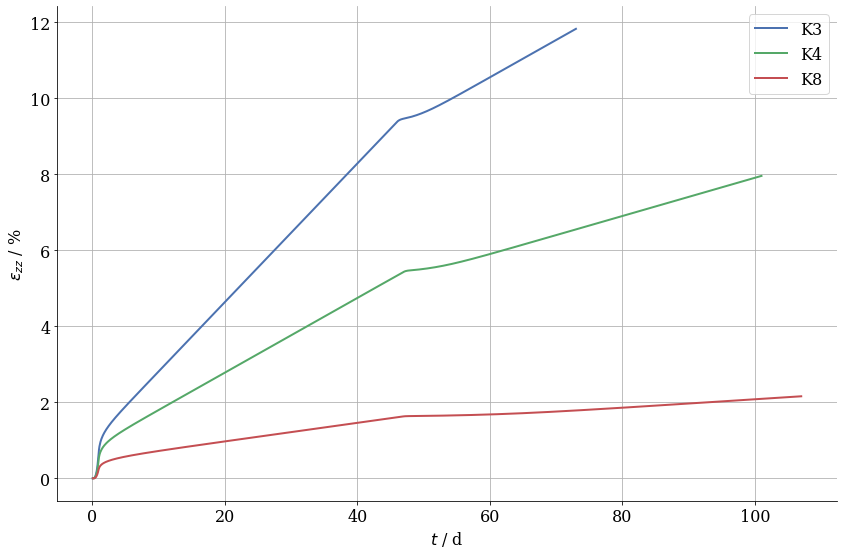

In [46]:
#HIDDEN
fig,ax = plt.subplots(figsize=(12,8))
t3, e3 = run_creep_Asse(T = 333, t1 = 46, t2 = 27, sdiff1 = -22, sdiff2 = -20, s3 = -20)
t4, e4 = run_creep_Asse(T = 333, t1 = 47, t2 = 54, sdiff1 = -20, sdiff2 = -18, s3 = -20)
t8, e8 = run_creep_Asse(T = 333, t1 = 47, t2 = 60, sdiff1 = -16, sdiff2 = -14, s3 = -20)
ax.plot(t3[1:],-e3[1:]*100, label= 'K3')
ax.plot(t4[1:],-e4[1:]*100, label= 'K4')
ax.plot(t8[1:],-e8[1:]*100, label= 'K8')
ax.set_xlabel('$t$ / d')
ax.set_ylabel('$\\epsilon_{zz}$ / %')
ax.grid('both')
ax.legend()
fig.tight_layout();

In [47]:
#HIDDEN
def run_stress_effect_sim(t_discrete, sax, T,ev0=1e-12):
    m    = mtest.MTest()
    m.setMaximumNumberOfSubSteps(10)
    m.setBehaviour('generic', 'src/libBehaviour.so', 'GuentherSalzer')
    m.setImposedStress('SXX', 0.0)
    m.setImposedStress('SYY', 0.0)
    m.setImposedStress('SZZ', {0:0, 1:-sax, 1e6: -sax})
    m.setImposedStress('SXZ', 0.0)
    m.setImposedStress('SYZ', 0.0)
    m.setImposedStress('SXY', 0.0)
    m.setMaterialProperty('YoungModulus', E)
    m.setMaterialProperty('PoissonRatio', nu)
    m.setMaterialProperty('PrimaryPowerLawFactor', Ap)
    m.setMaterialProperty('PrimaryPowerLawExponent', npe)
    m.setMaterialProperty('SecondaryPowerLawFactor1', As1)
    m.setMaterialProperty('SecondaryPowerLawExponent1', ns1/2)
    m.setMaterialProperty('SecondaryActivationEnergy1', Q1)
    m.setMaterialProperty('SecondaryPowerLawFactor2', As2)
    m.setMaterialProperty('SecondaryPowerLawExponent2', ns2)
    m.setMaterialProperty('SecondaryActivationEnergy2', Q2)
    m.setMaterialProperty('HardeningExponent', mup)
    m.setMaterialProperty('InitialHardening', ev0)
    m.setMaterialProperty('ReferenceStress', s0)
    m.setExternalStateVariable("Temperature", T)
    s = mtest.MTestCurrentState()
    wk = mtest.MTestWorkSpace()
    m.completeInitialisation()
    m.initializeCurrentState(s)
    m.initializeWorkSpace(wk)
    numerical = np.array([0.])
    prev = np.array([0.])
    for i in range(len(t_discrete)-1):
        m.execute(s, wk, t_discrete[i], t_discrete[i + 1])
        numerical = np.append(numerical,-s.e1[2])
        prev = np.append(prev,-s.e0[2])
    return numerical, prev

In [48]:
#HIDDEN
def run_stress_effect_sim_shear(t_discrete, sax, T,ev0=1e-12):
    m    = mtest.MTest()
    m.setMaximumNumberOfSubSteps(10)
    m.setBehaviour('generic', 'src/libBehaviour.so', 'GuentherSalzer')
    m.setImposedStress('SXX', 0.0)
    m.setImposedStress('SYY', 0.0)
    m.setImposedStress('SXY', {0:0, 1:-sax*np.sqrt(2), 1e6: -sax*np.sqrt(2)})
    m.setImposedStress('SXZ', 0.0)
    m.setImposedStress('SYZ', 0.0)
    m.setImposedStress('SZZ', 0.0)
    m.setMaterialProperty('YoungModulus', E)
    m.setMaterialProperty('PoissonRatio', nu)
    m.setMaterialProperty('PrimaryPowerLawFactor', Ap)
    m.setMaterialProperty('PrimaryPowerLawExponent', npe)
    m.setMaterialProperty('SecondaryPowerLawFactor1', As1)
    m.setMaterialProperty('SecondaryPowerLawExponent1', ns1/2)
    m.setMaterialProperty('SecondaryActivationEnergy1', Q1)
    m.setMaterialProperty('SecondaryPowerLawFactor2', As2)
    m.setMaterialProperty('SecondaryPowerLawExponent2', ns2)
    m.setMaterialProperty('SecondaryActivationEnergy2', Q2)
    m.setMaterialProperty('HardeningExponent', mup)
    m.setMaterialProperty('InitialHardening', ev0)
    m.setMaterialProperty('ReferenceStress', s0)
    m.setExternalStateVariable("Temperature", T)
    s = mtest.MTestCurrentState()
    wk = mtest.MTestWorkSpace()
    m.completeInitialisation()
    m.initializeCurrentState(s)
    m.initializeWorkSpace(wk)
    numerical = np.array([0.])
    prev = np.array([0.])
    for i in range(len(t_discrete)-1):
        m.execute(s, wk, t_discrete[i], t_discrete[i + 1])
        numerical = np.append(numerical,-s.e1[3]/np.sqrt(2))
        prev = np.append(prev,-s.e0[3]/np.sqrt(2))
    return numerical, prev

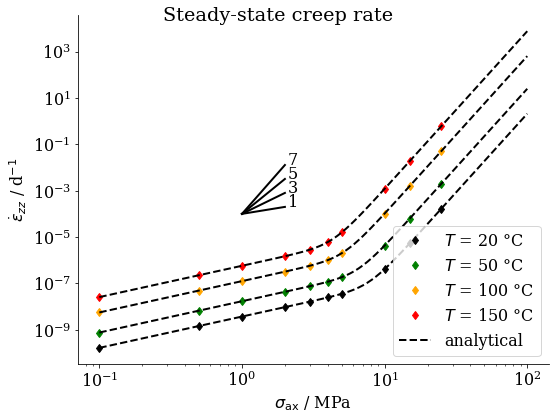

In [49]:
#HIDDEN
sax = np.array([0.1,0.5,1,2,3,4,5,10,15,25])
temps = [20,50,100,150]
cols = ['black','green','orange','red']
creep_rate = lambda sig, T: As1 * np.exp(-Q1/(8.3145*(273.15+T))) * np.power(sig/s0,ns1/2) + As2 * np.exp(-Q2/(8.3145*(273.15+T))) * np.power(sig/s0,ns2)
fig,ax = plt.subplots()
for s in sax:
    times = np.linspace(0,1e4,1000)
    for i,T in enumerate(temps):
        eps1, eps0 = run_stress_effect_sim(times,s,T+273.15,1e-14)
        dot_eps_av = (eps1[-1]-eps0[-1])/(times[-1] - times[-2])
        if s == sax[0]:
            ax.plot(s,dot_eps_av,label='$T$ = %i °C' %T, ls='', marker='d',color=cols[i])
        else:
            ax.plot(s,dot_eps_av, ls='', marker='d',color=cols[i])

sigs = np.logspace(-1,2,100)
ax.plot(sigs,creep_rate(sigs,temps[0]),color='black',ls='--',label='analytical')
for T in temps[1:]:
    ax.plot(sigs,creep_rate(sigs,T),color='black',ls='--')
ax.plot([1,2],[1e-4,128e-4],ls='-',color='black')#7
ax.plot([1,2],[1e-4,32e-4],ls='-',color='black')#5
ax.plot([1,2],[1e-4,8e-4],ls='-',color='black')#3
ax.plot([1,2],[1e-4,2e-4],ls='-',color='black')#1
ax.text(2.1,128e-4,'7')
ax.text(2.1,32e-4,'5')
ax.text(2.1,8e-4,'3')
ax.text(2.1,2e-4,'1')

ax.set_xlabel('$\\sigma_\\mathrm{ax}$ / MPa')
ax.set_ylabel('$\\dot{\\epsilon}_{zz}$ / d$^{-1}$')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(bottom=1e-10)
fig.tight_layout();
fig.suptitle('Steady-state creep rate')
ax.legend(loc='lower right');
fig.savefig('creep_mechanisms.pdf');

# Some tests...

Too high deviatoric stresses can be problematic (model with damage should be used) because creep rates become too high.

Too low deviatoric stresses can become problematic when total creep rate and stationary creep rate cause negative or excessive hardening strains.

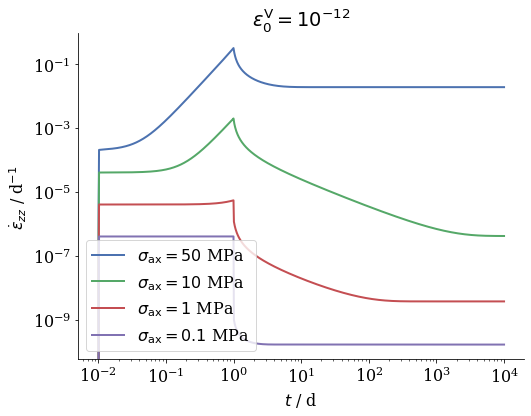

In [50]:
#HIDDEN
times = np.append(np.array([0]),np.logspace(-2,4,1000))
dt = np.array([])
for i,t in enumerate(times[1:]):
    dt = np.append(dt,times[i]-times[i-1])
eps1, eps0 = run_stress_effect_sim(times,50,20+273.15)
plt.plot(times[1:],(eps1[1:]-eps0[1:])/dt,label='$\\sigma_\\mathrm{ax} = 50$ MPa')
eps1, eps0 = run_stress_effect_sim(times,10,20+273.15)
plt.plot(times[1:],(eps1[1:]-eps0[1:])/dt,label='$\\sigma_\\mathrm{ax} = 10$ MPa')
eps1, eps0 = run_stress_effect_sim(times,1,20+273.15)
plt.plot(times[1:],(eps1[1:]-eps0[1:])/dt,label='$\\sigma_\\mathrm{ax} = 1$ MPa')
eps1, eps0 = run_stress_effect_sim(times,0.1,20+273.15)
plt.plot(times[1:],(eps1[1:]-eps0[1:])/dt,label='$\\sigma_\\mathrm{ax} = 0.1$ MPa')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ / d')
plt.ylabel('$\\dot{\\epsilon}_{zz}$ / d$^{-1}$')
plt.title('$\\epsilon^\\mathrm{V}_0 = 10^{-12}$')
plt.legend();

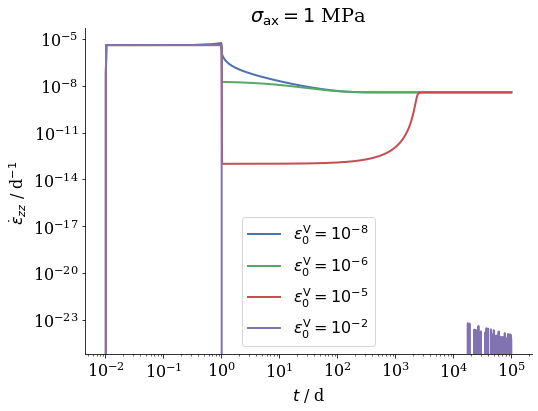

In [51]:
#HIDDEN
times = np.append(np.array([0]),np.logspace(-2,5,1000))
dt = np.array([])
for i,t in enumerate(times[1:]):
    dt = np.append(dt,times[i]-times[i-1])
eps1, eps0 = run_stress_effect_sim(times,1,20+273.15,ev0=1e-8)
plt.plot(times[1:],(eps1[1:]-eps0[1:])/dt,label='$\\epsilon^\\mathrm{V}_0 = 10^{-8}$')
eps1, eps0 = run_stress_effect_sim(times,1,20+273.15,ev0=1e-6)
plt.plot(times[1:],(eps1[1:]-eps0[1:])/dt,label='$\\epsilon^\\mathrm{V}_0 = 10^{-6}$')
eps1, eps0 = run_stress_effect_sim(times,1,20+273.15,ev0=1e-5)
plt.plot(times[1:],(eps1[1:]-eps0[1:])/dt,label='$\\epsilon^\\mathrm{V}_0 = 10^{-5}$')
eps1, eps0 = run_stress_effect_sim(times,1,20+273.15,ev0=1e-2)
plt.plot(times[1:],(eps1[1:]-eps0[1:])/dt,label='$\\epsilon^\\mathrm{V}_0 = 10^{-2}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ / d')
plt.ylabel('$\\dot{\\epsilon}_{zz}$ / d$^{-1}$')
plt.title('$\\sigma_\\mathrm{ax} = 1$ MPa')
plt.legend();

# It makes sense to put a lid on the latter initial creep rate to avoide excessive decrease of the time step. At the same time, the total creep rate must be large enough to accomodate other components of creep.

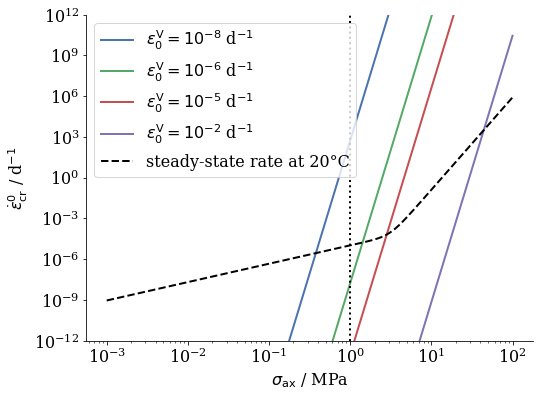

In [52]:
initial_rate = lambda s, e0: Ap*np.power(s/s0,npe)/np.power(e0,mup)
sns.color_palette("Paired")
s = np.logspace(-3,2,1000)
#plt.plot(s,initial_rate(s,1e-12),label='$\\epsilon^\\mathrm{V}_0 = 10^{-12}$')
plt.plot(s,initial_rate(s,1e-8),label='$\\epsilon^\\mathrm{V}_0 = 10^{-8}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-6),label='$\\epsilon^\\mathrm{V}_0 = 10^{-6}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-5),label='$\\epsilon^\\mathrm{V}_0 = 10^{-5}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-2),label='$\\epsilon^\\mathrm{V}_0 = 10^{-2}$ d$^{-1}$')
#plt.plot(s,initial_rate(s,1e0),label='$\\epsilon^\\mathrm{V}_0 = 10^{0}$')
plt.plot(s,creep_rate(s,20+273.15),label='steady-state rate at 20°C',ls='--',color='black')
plt.axvline(1,ls=':')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\sigma_\\mathrm{ax}$ / MPa')
plt.ylabel('$\\dot{\\epsilon}_\\mathrm{cr}^0$ / d$^{-1}$')
plt.ylim([1e-12,1e12])
plt.legend();

The latter graph shows why $\epsilon_0^\mathrm{V}$ can be both too large and too low. One way to tackle this is to choose low values and put a lid on the maximum creep rate.

Niedrigere Spannungsexponenten im Primärkriechen sind ebenfalls günstig

In [53]:
sigmoid = lambda x,thres: 1. / (1. + np.exp((x-thres)))
smooth_cutoff = lambda x, thres: (s-thres)*sigmoid(x,thres) + thres

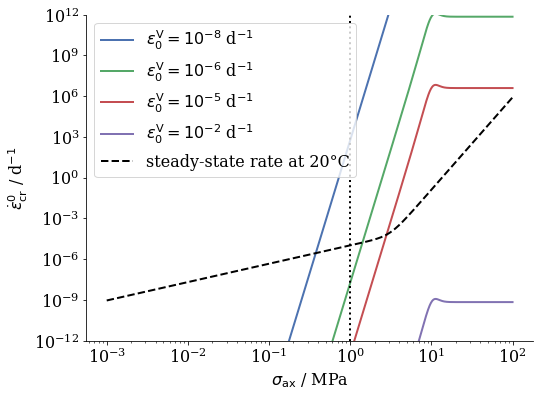

In [54]:
initial_rate = lambda s, e0: Ap*np.power(smooth_cutoff(s,10)/s0,npe)/np.power(e0,mup)
sns.color_palette("Paired")
s = np.logspace(-3,2,1000)
#plt.plot(s,initial_rate(s,1e-12),label='$\\epsilon^\\mathrm{V}_0 = 10^{-12}$')
plt.plot(s,initial_rate(s,1e-8),label='$\\epsilon^\\mathrm{V}_0 = 10^{-8}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-6),label='$\\epsilon^\\mathrm{V}_0 = 10^{-6}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-5),label='$\\epsilon^\\mathrm{V}_0 = 10^{-5}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-2),label='$\\epsilon^\\mathrm{V}_0 = 10^{-2}$ d$^{-1}$')
#plt.plot(s,initial_rate(s,1e0),label='$\\epsilon^\\mathrm{V}_0 = 10^{0}$')
plt.plot(s,creep_rate(s,20+273.15),label='steady-state rate at 20°C',ls='--',color='black')
plt.axvline(1,ls=':')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\sigma_\\mathrm{ax}$ / MPa')
plt.ylabel('$\\dot{\\epsilon}_\\mathrm{cr}^0$ / d$^{-1}$')
plt.ylim([1e-12,1e12])
plt.legend();

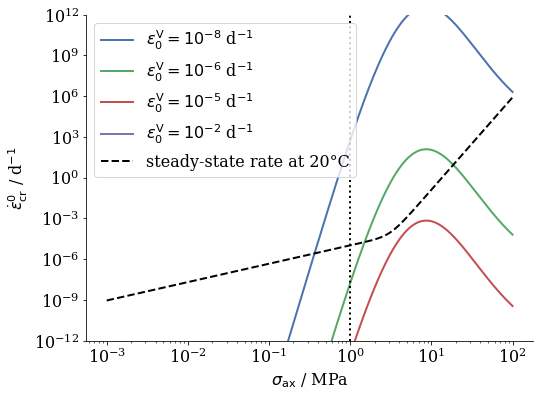

In [55]:
initial_rate = lambda s, e0: Ap*np.power(s/s0,npe/((s+10*s0)/s0/10))/np.power(e0,mup)
sns.color_palette("Paired")
s = np.logspace(-3,2,1000)
#plt.plot(s,initial_rate(s,1e-12),label='$\\epsilon^\\mathrm{V}_0 = 10^{-12}$')
plt.plot(s,initial_rate(s,1e-8),label='$\\epsilon^\\mathrm{V}_0 = 10^{-8}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-6),label='$\\epsilon^\\mathrm{V}_0 = 10^{-6}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-5),label='$\\epsilon^\\mathrm{V}_0 = 10^{-5}$ d$^{-1}$')
plt.plot(s,initial_rate(s,1e-2),label='$\\epsilon^\\mathrm{V}_0 = 10^{-2}$ d$^{-1}$')
#plt.plot(s,initial_rate(s,1e0),label='$\\epsilon^\\mathrm{V}_0 = 10^{0}$')
plt.plot(s,creep_rate(s,20+273.15),label='steady-state rate at 20°C',ls='--',color='black')
plt.axvline(1,ls=':')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\sigma_\\mathrm{ax}$ / MPa')
plt.ylabel('$\\dot{\\epsilon}_\\mathrm{cr}^0$ / d$^{-1}$')
plt.ylim([1e-12,1e12])
plt.legend();